In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from tensorflow.python.client import device_lib
# GPU 인식 되었는지 확인
if not tf.config.list_physical_devices('GPU'):
    print('GPU is not detected!!!')
else:
    print('GPU detected!!!\n')
    print('Device type list:')
    print(device_lib.list_local_devices())

GPU detected!!!

Device type list:
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15009554316490912425
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4850712576
locality {
  bus_id: 1
  links {
  }
}
incarnation: 885936704222994757
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [2]:
#모든 열 보기
pd.set_option('display.max_columns', None)

In [3]:
path = 'D:/Dataset/Competitons/Jeju/'
train = pd.read_csv(path + 'train.csv', parse_dates=["base_date"]).copy()
origin_train = train.copy()
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [9]:
train.describe()

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
count,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4701217.0,4.701217e+06,4701217.0,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06
mean,1.192820e+01,1.836651e+00,1.049585e+02,4.762597e-04,2.660218e-01,6.125329e+01,0.0,5.618742e+03,0.0,6.152237e-01,3.338432e+01,1.265217e+02,3.338432e+01,1.265217e+02,4.278844e+01
std,6.722092e+00,6.877513e-01,1.840107e+00,2.181818e-02,5.227760e+00,1.213354e+01,0.0,1.395343e+04,0.0,1.211268e+00,1.012015e-01,1.563657e-01,1.011948e-01,1.563519e-01,1.595443e+01
min,0.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,3.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.324343e+01,1.261826e+02,3.324343e+01,1.261826e+02,1.000000e+00
25%,6.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,5.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.326422e+01,1.264232e+02,3.326422e+01,1.264232e+02,3.000000e+01
50%,1.200000e+01,2.000000e+00,1.060000e+02,0.000000e+00,0.000000e+00,6.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.341257e+01,1.265112e+02,3.341257e+01,1.265112e+02,4.300000e+01
75%,1.800000e+01,2.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,7.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.347804e+01,1.265840e+02,3.347804e+01,1.265840e+02,5.400000e+01
max,2.300000e+01,3.000000e+00,1.070000e+02,1.000000e+00,1.030000e+02,8.000000e+01,0.0,5.000000e+04,0.0,3.000000e+00,3.355608e+01,1.269309e+02,3.355608e+01,1.269309e+02,1.130000e+02


변수명,변수 설명
1. id,아이디
2. base_date,날짜
3. day_of_week,요일
4. base_hour,시간대
5. road_in_use,도로사용여부
6. lane_count,차로수
7. road_rating,도로등급
8. multi_linked,중용구간 여부
9. connect_code,연결로 코드
10. maximum_speed_limit,최고속도제한
11. weight_restricted,통과제한하중
12. hight_restricted,통과제한높이
13. road_type,도로유형
14. start_latitude,시작지점의 위도
15. start_longitude,시작지점의 경도
16. start_turn_restricted,시작 지점의 회전제한 유무
17. end_latitude,도착지점의 위도
18. end_longitude,도착지점의 경도
19. end_turn_restricted,도작지점의 회전제한 유무
20. road_name,도로명
21. start_node_name,시작지점명
22. end_node_name,도착지점명
23. vehicle_restricted,통과제한차량
24. target,평균속도(km)

https://www.law.go.kr/LSW/admRulInfoP.do?admRulSeq=2100000157569

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     object        
 1   base_date              datetime64[ns]
 2   day_of_week            object        
 3   base_hour              int64         
 4   road_in_use            int64         
 5   lane_count             int64         
 6   road_rating            int64         
 7   road_name              object        
 8   multi_linked           int64         
 9   connect_code           int64         
 10  maximum_speed_limit    float64       
 11  vehicle_restricted     float64       
 12  weight_restricted      float64       
 13  height_restricted      float64       
 14  road_type              int64         
 15  start_node_name        object        
 16  start_latitude         float64       
 17  start_longitude        float64       
 18  start_turn_restricted 

In [5]:
train.head(5)

,id,base_date,day_of_week,base_hour,road_in_use,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,0,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,0,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,0,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,0,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,0,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [6]:
def make_columns(df, columns_1, columns_2):
    columns_1 = str(columns_1)
    columns_2 = str(columns_2)
    df[columns_1 +' + '+ columns_2] = df[columns_1] + df[columns_2]
    df[columns_1 +' - '+ columns_2] = df[columns_1] - df[columns_2]
    df[columns_2 +' - '+ columns_1] = df[columns_2] - df[columns_1]
    df[columns_1 +' * '+ columns_2] = df[columns_1] * df[columns_2]
    df[columns_1 +' / '+ columns_2] = df[columns_1] / df[columns_2]
    df[columns_2 +' / '+ columns_1] = df[columns_2] / df[columns_1]
    return df

In [7]:
from sklearn.preprocessing import LabelEncoder

def data_change(df):
#     df['day_of_week'] = LabelEncoder().fit_transform(df['day_of_week'])
#     df['road_name'] = LabelEncoder().fit_transform(df['road_name'])
#     df['start_node_name'] = LabelEncoder().fit_transform(df['start_node_name'])
#     df['start_turn_restricted'] = LabelEncoder().fit_transform(df['start_turn_restricted'])
#     df['end_node_name'] = LabelEncoder().fit_transform(df['end_node_name'])
#     df['end_turn_restricted'] = LabelEncoder().fit_transform(df['end_turn_restricted'])

    df.drop(['day_of_week'], axis = 1)
    df['year'] = df['base_date'].dt.year
    df['month'] = df['base_date'].dt.month
    df['day'] = df['base_date'].dt.day
    df['quarter'] = df['base_date'].dt.quarter
    df['day_of_week'] = df['base_date'].dt.dayofweek
    df.loc[df['start_turn_restricted'] == '있음', 'start_turn_restricted'] = 1
    df.loc[df['start_turn_restricted'] == '없음', 'start_turn_restricted'] = 0
    df.loc[df['end_turn_restricted'] == '있음', 'end_turn_restricted'] = 1
    df.loc[df['end_turn_restricted'] == '없음', 'end_turn_restricted'] = 0
    df = pd.get_dummies(data = df, columns = ['road_rating'], prefix = 'road_rating')
    df = pd.get_dummies(data = df, columns = ['road_type'], prefix = 'road_type')
    
    df['maximum_speed_limit - lane_count'] = df['maximum_speed_limit'] - df['lane_count']
#     df['map_distance'] = np.sqrt(((df['start_latitude'] - df['end_latitude'])**2) + ((df['start_longitude'] - df['end_longitude'])**2))
#     df['road_type - road_rating'] = df['road_type'] - df['road_rating']
    df['lane_count * base_hour'] = df['lane_count'] * df['base_hour']
    df['base_hour / month'] = df['base_hour'] / df['month']
    df['maximum_speed_limit - (lane_count * base_hour)'] = df['maximum_speed_limit'] - df['lane_count * base_hour']
#     df['base_hour / maximum_speed_limit'] = df['base_hour'] / df['maximum_speed_limit']

#     df['maximum_speed_limit - base_hour'] = df['maximum_speed_limit'] - df['base_hour']
#     make_columns(df, 'road_type', 'road_rating')
    
    return df

train = data_change(train)
test = data_change(test)
train

,id,base_date,day_of_week,base_hour,road_in_use,lane_count,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,quarter,road_rating_103,road_rating_106,road_rating_107,road_type_0,road_type_3,maximum_speed_limit - lane_count,lane_count * base_hour,base_hour / month,maximum_speed_limit - (lane_count * base_hour)
0,TRAIN_0000000,2022-06-23,3,17,0,1,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,제3교래교,33.427747,126.662612,0,제3교래교,33.427749,126.662335,0,52.0,2022,6,23,2,0,1,0,0,1,59.0,17,2.833333,43.0
1,TRAIN_0000001,2022-07-28,3,21,0,2,일반국도11호선,0,0,60.0,0.0,0.0,0.0,광양사거리,33.500730,126.529107,1,KAL사거리,33.504811,126.526240,0,30.0,2022,7,28,3,1,0,0,1,0,58.0,42,3.000000,18.0
2,TRAIN_0000002,2021-10-10,6,7,0,2,일반국도16호선,0,0,80.0,0.0,0.0,0.0,창고천교,33.279145,126.368598,0,상창육교,33.280072,126.362147,0,61.0,2021,10,10,4,1,0,0,1,0,78.0,14,0.700000,66.0
3,TRAIN_0000003,2022-03-11,4,13,0,2,태평로,0,0,50.0,0.0,0.0,0.0,남양리조트,33.246081,126.567204,0,서현주택,33.245565,126.566228,0,20.0,2022,3,11,1,0,0,1,1,0,48.0,26,4.333333,24.0
4,TRAIN_0000004,2021-10-05,1,8,0,2,일반국도12호선,0,0,80.0,0.0,0.0,0.0,애월샷시,33.462214,126.326551,0,애월입구,33.462677,126.330152,0,38.0,2021,10,5,4,1,0,0,1,0,78.0,16,0.800000,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,3,16,0,1,-,0,0,50.0,0.0,0.0,0.0,대림사거리,33.422145,126.278125,0,금덕해운,33.420955,126.273750,0,20.0,2021,11,4,4,0,0,1,1,0,49.0,16,1.454545,34.0
4701213,TRAIN_4701213,2022-03-31,3,2,0,2,-,0,0,80.0,0.0,43200.0,0.0,광삼교,33.472505,126.424368,0,광삼교,33.472525,126.424890,0,65.0,2022,3,31,1,0,0,1,0,1,78.0,4,0.666667,76.0
4701214,TRAIN_4701214,2022-06-13,0,22,0,2,일반국도12호선,0,0,60.0,0.0,0.0,0.0,고성교차로,33.447183,126.912579,0,성산교차로,33.444121,126.912948,0,30.0,2022,6,13,2,1,0,0,1,0,58.0,44,3.666667,16.0
4701215,TRAIN_4701215,2021-10-20,2,2,0,2,일반국도95호선,0,0,80.0,0.0,0.0,0.0,제6광령교,33.443596,126.431817,0,관광대학입구,33.444996,126.433332,0,73.0,2021,10,20,4,1,0,0,1,0,78.0,4,0.200000,76.0


In [8]:
test

,id,base_date,day_of_week,base_hour,road_in_use,lane_count,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day,quarter,road_rating_103,road_rating_106,road_rating_107,road_type_0,road_type_3,maximum_speed_limit - lane_count,lane_count * base_hour,base_hour / month,maximum_speed_limit - (lane_count * base_hour)
0,TEST_000000,2022-08-25,3,17,0,3,연삼로,0,0,70.0,0.0,0.0,0.0,산지2교,33.499427,126.541298,0,제주은행사거리,33.500772,126.543837,1,2022,8,25,3,0,0,1,1,0,67.0,51,2.125,19.0
1,TEST_000001,2022-08-09,1,12,0,2,일반국도12호선,0,0,70.0,0.0,0.0,0.0,중문입구,33.258507,126.427003,0,관광단지입구,33.258119,126.415840,0,2022,8,9,3,1,0,0,0,1,68.0,24,1.500,46.0
2,TEST_000002,2022-08-05,4,2,0,1,일반국도16호선,0,0,60.0,0.0,0.0,0.0,도순3교,33.258960,126.476508,0,도순2교,33.259206,126.474687,0,2022,8,5,3,1,0,0,1,0,59.0,2,0.250,58.0
3,TEST_000003,2022-08-18,3,23,0,3,일반국도11호선,0,0,70.0,0.0,0.0,0.0,아라주공아파트,33.473494,126.545647,0,인다마을,33.471061,126.545467,0,2022,8,18,3,1,0,0,1,0,67.0,69,2.875,1.0
4,TEST_000004,2022-08-10,2,17,0,3,번영로,0,0,70.0,0.0,0.0,0.0,부록교 시종점,33.501477,126.569223,0,봉개교 시종점,33.496863,126.581230,0,2022,8,10,3,0,1,0,1,0,67.0,51,2.125,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291236,TEST_291236,2022-08-27,5,5,0,1,일반국도16호선,0,0,80.0,0.0,0.0,0.0,월산마을,33.472819,126.463030,0,도근교,33.470483,126.460846,0,2022,8,27,3,1,0,0,1,0,79.0,5,0.625,75.0
291237,TEST_291237,2022-08-19,4,20,0,2,일반국도11호선,0,0,60.0,0.0,0.0,0.0,영주교,33.305359,126.598914,0,하례입구삼거리,33.300796,126.600332,0,2022,8,19,3,1,0,0,1,0,58.0,40,2.500,20.0
291238,TEST_291238,2022-08-05,4,11,0,1,신대로,0,0,30.0,0.0,0.0,0.0,마리나사거리,33.493624,126.496769,1,칠오광장사거리,33.497500,126.496946,1,2022,8,5,3,0,0,1,1,0,29.0,11,1.375,19.0
291239,TEST_291239,2022-08-12,4,7,0,2,경찰로,0,0,60.0,0.0,0.0,0.0,국민의료보험관리공단,33.254782,126.507014,0,의료보험조합,33.255659,126.507333,0,2022,8,12,3,0,0,1,1,0,58.0,14,0.875,46.0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 35 columns):
 #   Column                                          Dtype         
---  ------                                          -----         
 0   id                                              object        
 1   base_date                                       datetime64[ns]
 2   day_of_week                                     int64         
 3   base_hour                                       int64         
 4   road_in_use                                     int64         
 5   lane_count                                      int64         
 6   road_name                                       object        
 7   multi_linked                                    int64         
 8   connect_code                                    int64         
 9   maximum_speed_limit                             float64       
 10  vehicle_restricted                              float64       
 11

In [10]:
corr_matrix = train.corr()
corr_matrix['target'].sort_values(ascending=False)

target                                            1.000000
maximum_speed_limit - (lane_count * base_hour)    0.473003
maximum_speed_limit - lane_count                  0.442913
maximum_speed_limit                               0.425715
weight_restricted                                 0.294092
road_rating_103                                   0.207988
road_type_3                                       0.200840
road_rating_106                                   0.166097
connect_code                                      0.048348
start_latitude                                    0.036280
end_latitude                                      0.036139
road_in_use                                       0.026095
day_of_week                                       0.005911
month                                            -0.000225
end_longitude                                    -0.001000
start_longitude                                  -0.001168
multi_linked                                     -0.0084

<AxesSubplot:>

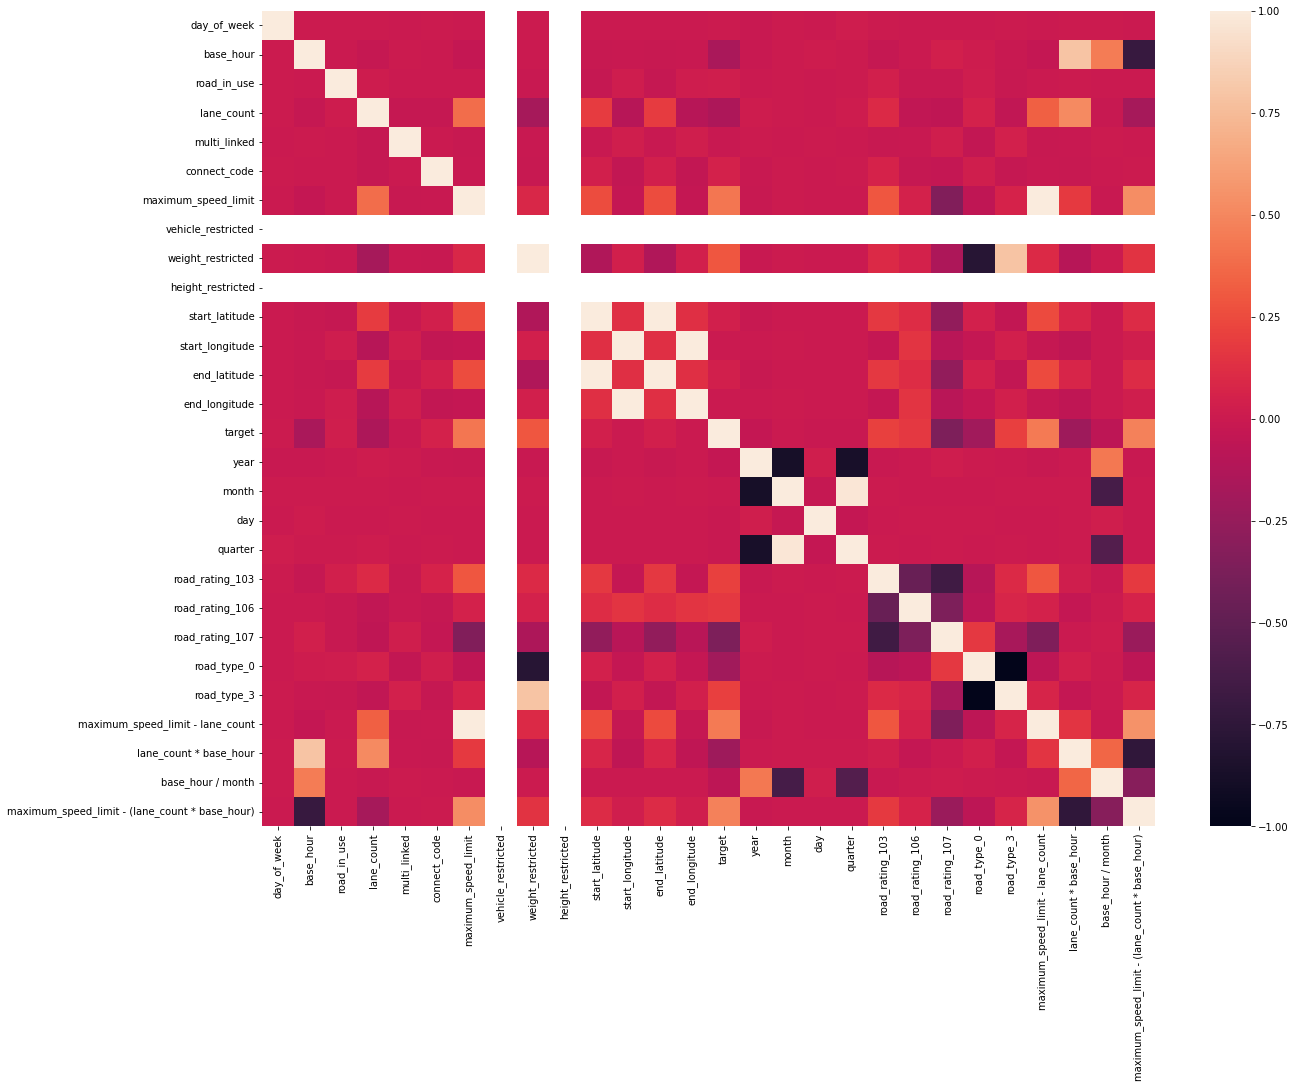

In [11]:
f, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(corr_matrix)

In [12]:
# from sklearn.ensemble import RandomForestRegressor
# X_train = train.drop(['id', 'base_date', 'target'], axis = 1)
# y_train = train['target'].copy()
# baseline_model = RandomForestRegressor(random_state = 42, verbose = 3)
# baseline_model.fit(X_train, y_train)

from catboost import CatBoostRegressor
X_train_cat = train.drop(['id', 'base_date', 'target', 'vehicle_restricted', 'height_restricted'], axis = 1)
y_train_cat = train['target'].copy()
cat_features = ['road_name', 'start_node_name', 'start_turn_restricted', 'end_node_name', 'end_turn_restricted']

In [13]:
num_cols = X_train_cat.columns[X_train_cat.dtypes != 'object'].to_list()

In [14]:
num_cols

['day_of_week',
 'base_hour',
 'road_in_use',
 'lane_count',
 'multi_linked',
 'connect_code',
 'maximum_speed_limit',
 'weight_restricted',
 'start_latitude',
 'start_longitude',
 'end_latitude',
 'end_longitude',
 'year',
 'month',
 'day',
 'quarter',
 'road_rating_103',
 'road_rating_106',
 'road_rating_107',
 'road_type_0',
 'road_type_3',
 'maximum_speed_limit - lane_count',
 'lane_count * base_hour',
 'base_hour / month',
 'maximum_speed_limit - (lane_count * base_hour)']

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cat[num_cols])
test_scaled = scaler.transform(test[num_cols])

In [16]:
X_train_cat_scaled = X_train_cat.copy()
test_cat = test.copy()

X_train_cat_scaled[num_cols] = X_train_scaled
test_cat[num_cols] = test_scaled

In [17]:
X_train_cat_scaled

,day_of_week,base_hour,road_in_use,lane_count,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day,quarter,road_rating_103,road_rating_106,road_rating_107,road_type_0,road_type_3,maximum_speed_limit - lane_count,lane_count * base_hour,base_hour / month,maximum_speed_limit - (lane_count * base_hour)
0,-0.006286,0.754498,-0.036936,-1.216503,지방도1112호선,-0.021829,-0.050886,-0.103292,1.919331,제3교래교,0.429152,0.901272,0,제3교래교,0.429179,0.899511,0,0.804187,-0.079493,0.874433,-0.310622,-0.921754,1.974764,-0.712237,-1.968826,1.968826,-0.035052,-0.308759,-0.164858,0.196790
1,-0.006286,1.349551,-0.036936,0.237511,일반국도11호선,-0.021829,-0.050886,-0.103292,-0.402678,광양사거리,1.150320,0.047471,1,KAL사거리,1.190706,0.029071,0,0.804187,0.185615,1.426510,0.514382,1.084888,-0.506390,-0.712237,0.507917,-0.507917,-0.119182,1.308468,-0.127571,-1.200992
2,1.497697,-0.733134,-0.036936,0.237511,일반국도16호선,-0.021829,-0.050886,1.545032,-0.402678,창고천교,-1.039228,-0.979027,0,상창육교,-1.030152,-1.020437,0,-1.243492,0.980939,-0.560966,1.339386,1.084888,-0.506390,-0.712237,0.507917,-0.507917,1.563412,-0.502827,-0.642132,1.482749
3,0.495042,0.159445,-0.036936,0.237511,태평로,-0.021829,-0.050886,-0.927454,-0.402678,남양리조트,-1.365944,0.291115,0,서현주택,-1.371145,0.284828,0,0.804187,-0.874818,-0.450551,-1.135625,-0.921754,-0.506390,1.404026,0.507917,-0.507917,-0.960478,0.273443,0.170726,-0.865524
4,-1.008941,-0.584371,-0.036936,0.237511,일반국도12호선,-0.021829,-0.050886,1.545032,-0.402678,애월샷시,0.769731,-1.247926,0,애월입구,0.774335,-1.225076,0,-1.243492,0.980939,-1.113043,1.339386,1.084888,-0.506390,-0.712237,0.507917,-0.507917,1.563412,-0.373448,-0.619760,1.370926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,-0.006286,0.605735,-0.036936,-1.216503,-,-0.021829,-0.050886,-0.927454,-0.402678,대림사거리,0.373791,-1.557627,0,금덕해운,0.362039,-1.585812,0,-1.243492,1.246047,-1.223458,1.339386,-0.921754,-0.506390,1.404026,0.507917,-0.507917,-0.876348,-0.373448,-0.473323,-0.306412
4701213,-0.006286,-1.476951,-0.036936,0.237511,-,-0.021829,-0.050886,1.545032,2.693334,광삼교,0.871416,-0.622360,0,광삼교,0.871656,-0.619146,0,0.804187,-0.874818,1.757756,-1.135625,-0.921754,-0.506390,1.404026,-1.968826,1.968826,1.563412,-1.149718,-0.649589,2.041861
4701214,-1.510269,1.498314,-0.036936,0.237511,일반국도12호선,-0.021829,-0.050886,-0.103292,-0.402678,고성교차로,0.621200,2.499876,0,성산교차로,0.590966,2.502387,0,0.804187,-0.079493,-0.229720,-0.310622,1.084888,-0.506390,-0.712237,0.507917,-0.507917,-0.119182,1.437847,0.021577,-1.312814
4701215,-0.507613,-1.476951,-0.036936,0.237511,일반국도95호선,-0.021829,-0.050886,1.545032,-0.402678,제6광령교,0.585761,-0.574724,0,관광대학입구,0.599615,-0.565155,0,-1.243492,0.980939,0.543187,1.339386,1.084888,-0.506390,-0.712237,0.507917,-0.507917,1.563412,-1.149718,-0.753993,2.041861


In [18]:
X_train_cat_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 30 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   day_of_week                                     float64
 1   base_hour                                       float64
 2   road_in_use                                     float64
 3   lane_count                                      float64
 4   road_name                                       object 
 5   multi_linked                                    float64
 6   connect_code                                    float64
 7   maximum_speed_limit                             float64
 8   weight_restricted                               float64
 9   start_node_name                                 object 
 10  start_latitude                                  float64
 11  start_longitude                                 float64
 12  start_turn_restricted       

In [19]:
cat = CatBoostRegressor(random_state = 42, cat_features=cat_features)
cat.fit(X_train_cat_scaled, y_train_cat, verbose = True)

Learning rate set to 0.155736
0:	learn: 14.2628867	total: 1.33s	remaining: 22m 11s
1:	learn: 12.9059523	total: 2.44s	remaining: 20m 17s
2:	learn: 11.8385636	total: 3.35s	remaining: 18m 32s
3:	learn: 11.0006451	total: 4.28s	remaining: 17m 44s
4:	learn: 10.2936237	total: 5.35s	remaining: 17m 45s
5:	learn: 9.7450093	total: 6.16s	remaining: 17m 1s
6:	learn: 9.3147490	total: 7.11s	remaining: 16m 48s
7:	learn: 8.9950135	total: 7.84s	remaining: 16m 12s
8:	learn: 8.7325858	total: 8.51s	remaining: 15m 37s
9:	learn: 8.5222050	total: 9.42s	remaining: 15m 32s
10:	learn: 8.3040038	total: 10.3s	remaining: 15m 30s
11:	learn: 8.1019383	total: 10.9s	remaining: 14m 57s
12:	learn: 7.9389013	total: 11.5s	remaining: 14m 36s
13:	learn: 7.8069541	total: 12.3s	remaining: 14m 28s
14:	learn: 7.7054045	total: 13.1s	remaining: 14m 20s
15:	learn: 7.6051500	total: 13.9s	remaining: 14m 13s
16:	learn: 7.5312193	total: 14.7s	remaining: 14m 7s
17:	learn: 7.4699682	total: 15.4s	remaining: 14m 1s
18:	learn: 7.4247732	tot

153:	learn: 5.9393284	total: 2m 32s	remaining: 13m 58s
154:	learn: 5.9357256	total: 2m 33s	remaining: 13m 56s
155:	learn: 5.9257435	total: 2m 34s	remaining: 13m 56s
156:	learn: 5.9229402	total: 2m 35s	remaining: 13m 55s
157:	learn: 5.9189006	total: 2m 36s	remaining: 13m 54s
158:	learn: 5.9159684	total: 2m 37s	remaining: 13m 53s
159:	learn: 5.9111539	total: 2m 38s	remaining: 13m 53s
160:	learn: 5.9084068	total: 2m 39s	remaining: 13m 53s
161:	learn: 5.9074149	total: 2m 41s	remaining: 13m 52s
162:	learn: 5.9039858	total: 2m 42s	remaining: 13m 52s
163:	learn: 5.9009250	total: 2m 43s	remaining: 13m 52s
164:	learn: 5.8954961	total: 2m 44s	remaining: 13m 51s
165:	learn: 5.8906892	total: 2m 45s	remaining: 13m 50s
166:	learn: 5.8867204	total: 2m 46s	remaining: 13m 49s
167:	learn: 5.8837019	total: 2m 47s	remaining: 13m 49s
168:	learn: 5.8759270	total: 2m 48s	remaining: 13m 49s
169:	learn: 5.8727555	total: 2m 49s	remaining: 13m 48s
170:	learn: 5.8695751	total: 2m 50s	remaining: 13m 47s
171:	learn

304:	learn: 5.5322247	total: 5m 13s	remaining: 11m 53s
305:	learn: 5.5289369	total: 5m 14s	remaining: 11m 52s
306:	learn: 5.5267608	total: 5m 15s	remaining: 11m 51s
307:	learn: 5.5253491	total: 5m 16s	remaining: 11m 50s
308:	learn: 5.5241356	total: 5m 17s	remaining: 11m 49s
309:	learn: 5.5220504	total: 5m 18s	remaining: 11m 49s
310:	learn: 5.5202659	total: 5m 19s	remaining: 11m 48s
311:	learn: 5.5192753	total: 5m 20s	remaining: 11m 47s
312:	learn: 5.5181500	total: 5m 21s	remaining: 11m 46s
313:	learn: 5.5168789	total: 5m 22s	remaining: 11m 45s
314:	learn: 5.5152289	total: 5m 23s	remaining: 11m 44s
315:	learn: 5.5137369	total: 5m 24s	remaining: 11m 43s
316:	learn: 5.5127865	total: 5m 26s	remaining: 11m 42s
317:	learn: 5.5114070	total: 5m 27s	remaining: 11m 41s
318:	learn: 5.5093891	total: 5m 28s	remaining: 11m 40s
319:	learn: 5.5078985	total: 5m 29s	remaining: 11m 39s
320:	learn: 5.5065361	total: 5m 30s	remaining: 11m 38s
321:	learn: 5.5032255	total: 5m 31s	remaining: 11m 37s
322:	learn

455:	learn: 5.3121021	total: 7m 50s	remaining: 9m 21s
456:	learn: 5.3108543	total: 7m 51s	remaining: 9m 20s
457:	learn: 5.3098594	total: 7m 52s	remaining: 9m 19s
458:	learn: 5.3082714	total: 7m 53s	remaining: 9m 18s
459:	learn: 5.3073121	total: 7m 54s	remaining: 9m 17s
460:	learn: 5.3061944	total: 7m 55s	remaining: 9m 16s
461:	learn: 5.3057731	total: 7m 56s	remaining: 9m 15s
462:	learn: 5.3048036	total: 7m 57s	remaining: 9m 14s
463:	learn: 5.3032629	total: 7m 58s	remaining: 9m 13s
464:	learn: 5.3023875	total: 8m	remaining: 9m 12s
465:	learn: 5.3014441	total: 8m 1s	remaining: 9m 11s
466:	learn: 5.3000229	total: 8m 2s	remaining: 9m 10s
467:	learn: 5.2983451	total: 8m 3s	remaining: 9m 9s
468:	learn: 5.2973082	total: 8m 4s	remaining: 9m 8s
469:	learn: 5.2959307	total: 8m 5s	remaining: 9m 7s
470:	learn: 5.2952166	total: 8m 6s	remaining: 9m 6s
471:	learn: 5.2947834	total: 8m 7s	remaining: 9m 5s
472:	learn: 5.2938773	total: 8m 8s	remaining: 9m 4s
473:	learn: 5.2927449	total: 8m 9s	remaining: 

608:	learn: 5.1702396	total: 10m 31s	remaining: 6m 45s
609:	learn: 5.1692178	total: 10m 32s	remaining: 6m 44s
610:	learn: 5.1685956	total: 10m 33s	remaining: 6m 43s
611:	learn: 5.1683387	total: 10m 34s	remaining: 6m 42s
612:	learn: 5.1677619	total: 10m 35s	remaining: 6m 41s
613:	learn: 5.1672549	total: 10m 36s	remaining: 6m 40s
614:	learn: 5.1664472	total: 10m 37s	remaining: 6m 39s
615:	learn: 5.1658789	total: 10m 38s	remaining: 6m 38s
616:	learn: 5.1650817	total: 10m 39s	remaining: 6m 37s
617:	learn: 5.1643298	total: 10m 41s	remaining: 6m 36s
618:	learn: 5.1636904	total: 10m 42s	remaining: 6m 35s
619:	learn: 5.1631988	total: 10m 43s	remaining: 6m 34s
620:	learn: 5.1629696	total: 10m 44s	remaining: 6m 33s
621:	learn: 5.1612735	total: 10m 45s	remaining: 6m 32s
622:	learn: 5.1610176	total: 10m 46s	remaining: 6m 31s
623:	learn: 5.1604722	total: 10m 47s	remaining: 6m 30s
624:	learn: 5.1599799	total: 10m 48s	remaining: 6m 29s
625:	learn: 5.1592998	total: 10m 49s	remaining: 6m 28s
626:	learn

759:	learn: 5.0659804	total: 13m 8s	remaining: 4m 8s
760:	learn: 5.0649684	total: 13m 9s	remaining: 4m 7s
761:	learn: 5.0635957	total: 13m 10s	remaining: 4m 6s
762:	learn: 5.0632281	total: 13m 11s	remaining: 4m 5s
763:	learn: 5.0626783	total: 13m 12s	remaining: 4m 4s
764:	learn: 5.0625382	total: 13m 13s	remaining: 4m 3s
765:	learn: 5.0620782	total: 13m 14s	remaining: 4m 2s
766:	learn: 5.0617885	total: 13m 14s	remaining: 4m 1s
767:	learn: 5.0611683	total: 13m 16s	remaining: 4m
768:	learn: 5.0608693	total: 13m 17s	remaining: 3m 59s
769:	learn: 5.0601203	total: 13m 18s	remaining: 3m 58s
770:	learn: 5.0593982	total: 13m 19s	remaining: 3m 57s
771:	learn: 5.0587537	total: 13m 20s	remaining: 3m 56s
772:	learn: 5.0582736	total: 13m 21s	remaining: 3m 55s
773:	learn: 5.0578807	total: 13m 22s	remaining: 3m 54s
774:	learn: 5.0572565	total: 13m 23s	remaining: 3m 53s
775:	learn: 5.0567943	total: 13m 24s	remaining: 3m 52s
776:	learn: 5.0563645	total: 13m 25s	remaining: 3m 51s
777:	learn: 5.0561188	to

910:	learn: 4.9965456	total: 15m 47s	remaining: 1m 32s
911:	learn: 4.9962356	total: 15m 48s	remaining: 1m 31s
912:	learn: 4.9956832	total: 15m 49s	remaining: 1m 30s
913:	learn: 4.9953691	total: 15m 50s	remaining: 1m 29s
914:	learn: 4.9944413	total: 15m 51s	remaining: 1m 28s
915:	learn: 4.9938701	total: 15m 52s	remaining: 1m 27s
916:	learn: 4.9937471	total: 15m 53s	remaining: 1m 26s
917:	learn: 4.9934845	total: 15m 54s	remaining: 1m 25s
918:	learn: 4.9932818	total: 15m 55s	remaining: 1m 24s
919:	learn: 4.9930284	total: 15m 56s	remaining: 1m 23s
920:	learn: 4.9926297	total: 15m 56s	remaining: 1m 22s
921:	learn: 4.9922472	total: 15m 58s	remaining: 1m 21s
922:	learn: 4.9915271	total: 15m 59s	remaining: 1m 20s
923:	learn: 4.9908866	total: 16m	remaining: 1m 18s
924:	learn: 4.9907018	total: 16m 1s	remaining: 1m 17s
925:	learn: 4.9904308	total: 16m 2s	remaining: 1m 16s
926:	learn: 4.9900885	total: 16m 3s	remaining: 1m 15s
927:	learn: 4.9893097	total: 16m 4s	remaining: 1m 14s
928:	learn: 4.9889

In [20]:
test_model_cat = test_cat.drop(['id', 'base_date', 'vehicle_restricted', 'height_restricted'], axis = 1)
pred_cat = cat.predict(test_model_cat)

Text(0.5, 1.0, 'Feature Importance')

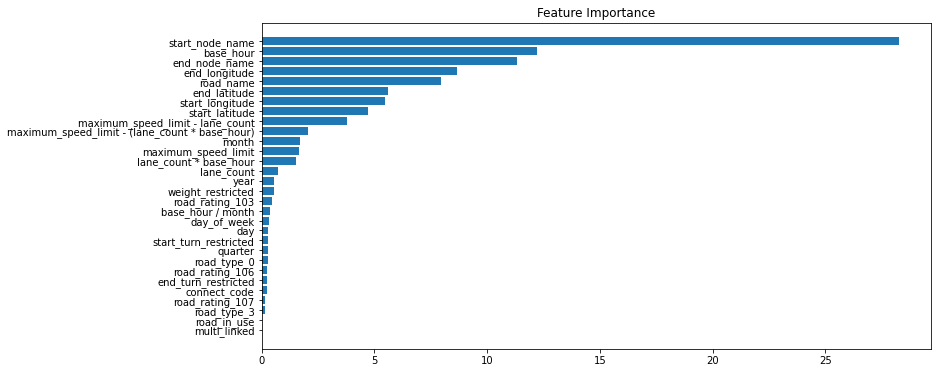

In [21]:
feature_importance = cat.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train_cat_scaled.columns)[sorted_idx])
plt.title('Feature Importance')

In [22]:
pred_cat

array([23.89119091, 45.13075473, 62.32954788, ..., 22.34312043,
       23.82501572, 46.15191798])

In [23]:
output = pd.DataFrame({'id' : test.id, 'target':pred_cat})
output.to_csv('cat_scaled.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [16]:
def label_change(df):
    df['road_name'] = LabelEncoder().fit_transform(df['road_name'])
    df['start_node_name'] = LabelEncoder().fit_transform(df['start_node_name'])
    df['start_turn_restricted'] = LabelEncoder().fit_transform(df['start_turn_restricted'])
    df['end_node_name'] = LabelEncoder().fit_transform(df['end_node_name'])
    df['end_turn_restricted'] = LabelEncoder().fit_transform(df['end_turn_restricted'])

    return df

train_label = label_change(train)
test_label = label_change(test)
train_label

,id,base_date,day_of_week,base_hour,road_in_use,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,quarter
0,TRAIN_0000000,2022-06-23,1,17,0,1,106,46,0,0,60.0,0.0,32.4,0.0,3,386,33.427747,126.662612,0,386,33.427749,126.662335,0,52.0,2022,6,23,2
1,TRAIN_0000001,2022-07-28,1,21,0,2,103,34,0,0,60.0,0.0,0.0,0.0,0,32,33.500730,126.529107,1,2,33.504811,126.526240,0,30.0,2022,7,28,3
2,TRAIN_0000002,2021-10-10,4,7,0,2,103,36,0,0,80.0,0.0,0.0,0.0,0,426,33.279145,126.368598,0,179,33.280072,126.362147,0,61.0,2021,10,10,4
3,TRAIN_0000003,2022-03-11,0,13,0,2,107,57,0,0,50.0,0.0,0.0,0.0,0,58,33.246081,126.567204,0,203,33.245565,126.566228,0,20.0,2022,3,11,1
4,TRAIN_0000004,2021-10-05,6,8,0,2,103,35,0,0,80.0,0.0,0.0,0.0,0,267,33.462214,126.326551,0,269,33.462677,126.330152,0,38.0,2021,10,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,1,16,0,1,107,0,0,0,50.0,0.0,0.0,0.0,0,79,33.422145,126.278125,0,42,33.420955,126.273750,0,20.0,2021,11,4,4
4701213,TRAIN_4701213,2022-03-31,1,2,0,2,107,0,0,0,80.0,0.0,43.2,0.0,3,31,33.472505,126.424368,0,31,33.472525,126.424890,0,65.0,2022,3,31,1
4701214,TRAIN_4701214,2022-06-13,3,22,0,2,103,35,0,0,60.0,0.0,0.0,0.0,0,19,33.447183,126.912579,0,214,33.444121,126.912948,0,30.0,2022,6,13,2
4701215,TRAIN_4701215,2021-10-20,2,2,0,2,103,37,0,0,80.0,0.0,0.0,0.0,0,392,33.443596,126.431817,0,23,33.444996,126.433332,0,73.0,2021,10,20,4


In [17]:
test_label

,id,base_date,day_of_week,base_hour,road_in_use,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day,quarter
0,TEST_000000,2022-08-25,1,17,0,3,107,27,0,0,70.0,0.0,0.0,0.0,0,79,33.499427,126.541298,0,208,33.500772,126.543837,1,2022,8,25,3
1,TEST_000001,2022-08-09,6,12,0,2,103,30,0,0,70.0,0.0,0.0,0.0,3,211,33.258507,126.427003,0,9,33.258119,126.415840,0,2022,8,9,3
2,TEST_000002,2022-08-05,0,2,0,1,103,31,0,0,60.0,0.0,0.0,0.0,0,45,33.258960,126.476508,0,45,33.259206,126.474687,0,2022,8,5,3
3,TEST_000003,2022-08-18,1,23,0,3,103,29,0,0,70.0,0.0,0.0,0.0,0,129,33.473494,126.545647,0,180,33.471061,126.545467,0,2022,8,18,3
4,TEST_000004,2022-08-10,2,17,0,3,106,11,0,0,70.0,0.0,0.0,0.0,0,73,33.501477,126.569223,0,72,33.496863,126.581230,0,2022,8,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291236,TEST_291236,2022-08-27,5,5,0,1,103,31,0,0,80.0,0.0,0.0,0.0,0,168,33.472819,126.463030,0,41,33.470483,126.460846,0,2022,8,27,3
291237,TEST_291237,2022-08-19,0,20,0,2,103,29,0,0,60.0,0.0,0.0,0.0,0,140,33.305359,126.598914,0,230,33.300796,126.600332,0,2022,8,19,3
291238,TEST_291238,2022-08-05,0,11,0,1,107,20,0,0,30.0,0.0,0.0,0.0,0,59,33.493624,126.496769,1,227,33.497500,126.496946,1,2022,8,5,3
291239,TEST_291239,2022-08-12,0,7,0,2,107,1,0,0,60.0,0.0,0.0,0.0,0,16,33.254782,126.507014,0,176,33.255659,126.507333,0,2022,8,12,3


In [18]:
from xgboost import XGBRegressor
X_train = train_label.drop(['id', 'base_date', 'target', 'vehicle_restricted', 'height_restricted'], axis = 1)
y_train = train_label['target'].copy()
X_train

,day_of_week,base_hour,road_in_use,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day,quarter
0,1,17,0,1,106,46,0,0,60.0,32.4,3,386,33.427747,126.662612,0,386,33.427749,126.662335,0,2022,6,23,2
1,1,21,0,2,103,34,0,0,60.0,0.0,0,32,33.500730,126.529107,1,2,33.504811,126.526240,0,2022,7,28,3
2,4,7,0,2,103,36,0,0,80.0,0.0,0,426,33.279145,126.368598,0,179,33.280072,126.362147,0,2021,10,10,4
3,0,13,0,2,107,57,0,0,50.0,0.0,0,58,33.246081,126.567204,0,203,33.245565,126.566228,0,2022,3,11,1
4,6,8,0,2,103,35,0,0,80.0,0.0,0,267,33.462214,126.326551,0,269,33.462677,126.330152,0,2021,10,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,1,16,0,1,107,0,0,0,50.0,0.0,0,79,33.422145,126.278125,0,42,33.420955,126.273750,0,2021,11,4,4
4701213,1,2,0,2,107,0,0,0,80.0,43.2,3,31,33.472505,126.424368,0,31,33.472525,126.424890,0,2022,3,31,1
4701214,3,22,0,2,103,35,0,0,60.0,0.0,0,19,33.447183,126.912579,0,214,33.444121,126.912948,0,2022,6,13,2
4701215,2,2,0,2,103,37,0,0,80.0,0.0,0,392,33.443596,126.431817,0,23,33.444996,126.433332,0,2021,10,20,4


In [19]:
xgb = XGBRegressor(random_state = 42)
xgb.fit(X_train, y_train, verbose = True)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [20]:
test_xgb = test_label.drop(['id', 'base_date', 'vehicle_restricted', 'height_restricted'], axis = 1)
pred_xgb = xgb.predict(test_xgb)

In [21]:
pred_xgb

array([25.156832, 46.305485, 61.558216, ..., 21.240435, 20.557356,
       41.426277], dtype=float32)

In [22]:
from sklearn.preprocessing import StandardScaler

train_label_drop = train_label.drop(['id', 'base_date', 'target', 'vehicle_restricted', 'height_restricted'], axis = 1)
test_label_drop = test_label.drop(['id', 'base_date', 'vehicle_restricted', 'height_restricted'], axis = 1)

scaler = StandardScaler()
scaler.fit(train_label_drop)

train_label_scaler = scaler.transform(train_label_drop)
test_label_scaler = scaler.transform(test_label_drop)

In [23]:
train_label_scaler

array([[-0.99102944,  0.75449791, -0.03693605, ..., -0.07949337,
         0.87443317, -0.31062156],
       [-0.99102944,  1.34955084, -0.03693605, ...,  0.1856148 ,
         1.42650986,  0.51438208],
       [ 0.50748941, -0.7331344 , -0.03693605, ...,  0.98093931,
        -0.56096623,  1.33938572],
       ...,
       [ 0.00798313,  1.49831407, -0.03693605, ..., -0.07949337,
        -0.22972022, -0.31062156],
       [-0.49152316, -1.47695055, -0.03693605, ...,  0.98093931,
         0.54318715,  1.33938572],
       [ 1.50650198, -0.88189763, -0.03693605, ...,  0.98093931,
         0.43277182,  1.33938572]])

In [ ]:
# output = pd.DataFrame({'id' : test.id, 'target':(pred_cat + pred_xgb) / 2})
# output.to_csv('Vot.csv', index=False)
# print("Your submission was successfully saved!")